In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#reading data
data = pd.read_csv('data/headbrain.csv')
print(data.shape)
data.head()

(1281, 4)


,Gender,Age Range,Head Size(cm^3),Brain weight(grams)
0,1,1,4512,1530
1,2,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
X=data[" Head Size(cm^3)"].values
Y=data[" Brain weight(grams)"].values

Index(['Gender', ' Age Range', ' Head Size(cm^3)', ' Brain weight(grams)'], dtype='object')


In [13]:
#mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n = len(X)

#using formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1,b0)

0.382062600168107 -223.97150955421216


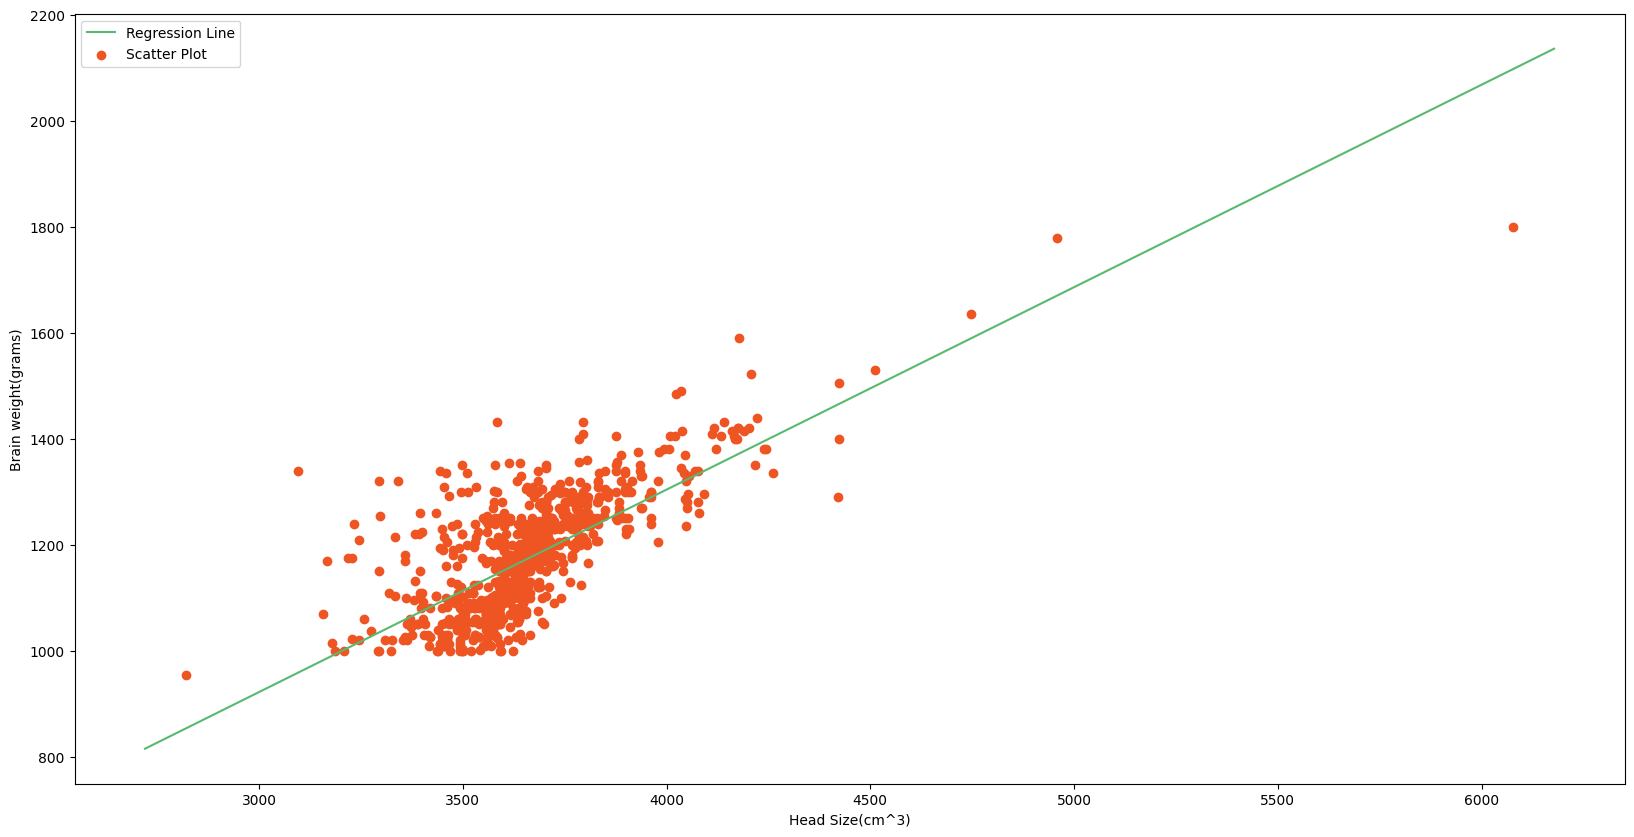

In [14]:
#plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#ploting line
plt.plot(x, y, color = '#58b970', label = 'Regression Line')
#plotting scatter points
plt.scatter(X, Y, c = '#ef5423', label = "Scatter Plot")

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain weight(grams)')
plt.legend()
plt.show()

In [15]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5093836047933982


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(n, 1)
reg = LinearRegression()
reg = reg.fit(X, y)
Y_pred = reg.predict(X)
r2_score = reg.score(X